In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#AUMENTO DE DATOS
#Creo el dataset generador

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

data_gen_entrenamiento = datagen.flow_from_directory(
    "brain_tumor_dataset",
    target_size=(250,250),
    color_mode = "grayscale",
    batch_size=32,
    shuffle=True,
    subset="training"
)

data_gen_prueba = datagen.flow_from_directory(
    "brain_tumor_dataset",
    target_size=(250,250),
    color_mode = "grayscale",
    batch_size=32,
    shuffle=True,
    subset="validation"
)



Found 464 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


<function matplotlib.pyplot.show(close=None, block=None)>

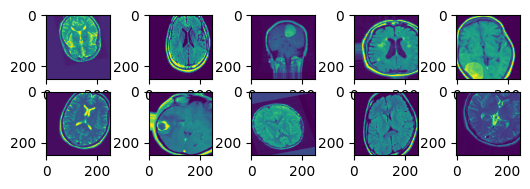

In [8]:
#muestro algunas imagenes
for imagenes, etiquetas in data_gen_entrenamiento:
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.imshow(imagenes[i])
    break
plt.show

In [9]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(250,250,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1000, activation="relu"),
    tf.keras.layers.Dropout(0.5),  # Regularización
    tf.keras.layers.Dense(2,activation="softmax")
])

In [10]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [11]:
modelo.fit(
    data_gen_entrenamiento,
    epochs = 30,
    batch_size= 32,
    validation_data= data_gen_prueba
)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4993 - loss: 0.9605 - val_accuracy: 0.5051 - val_loss: 0.6891
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4982 - loss: 0.6822 - val_accuracy: 0.5152 - val_loss: 0.6563
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5724 - loss: 0.6250 - val_accuracy: 0.7020 - val_loss: 0.5777
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6819 - loss: 0.5516 - val_accuracy: 0.7424 - val_loss: 0.5283
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7163 - loss: 0.5558 - val_accuracy: 0.6667 - val_loss: 0.6009
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7639 - loss: 0.4992 - val_accuracy: 0.7374 - val_loss: 0.5221
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7698 - loss: 0.4906 - val_accuracy: 0.7020 - val_loss: 0.5670
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7937 - loss: 0.4569 - val_accuracy: 0.6818 - val_loss:

Found 20 images belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


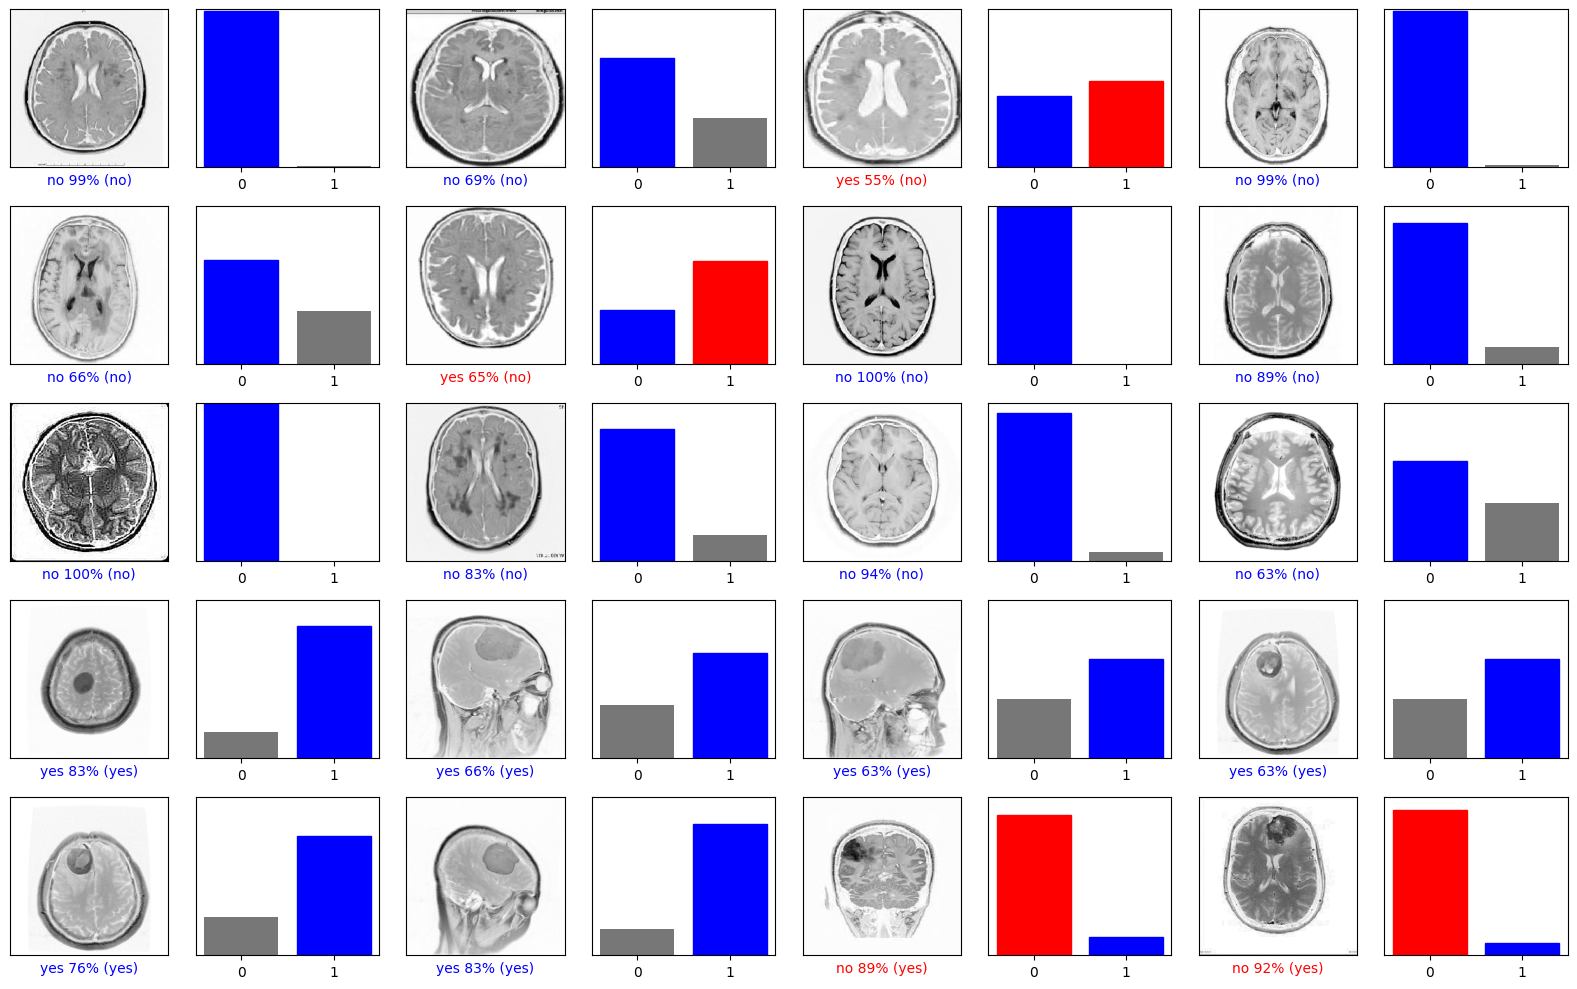

In [104]:
#GRAFICO ALGUNAS IMÁGENES PARA VER EL FUNCIONAMIENTO DEL MODELO GRÁFICAMENTE

datagen_testeo = ImageDataGenerator(rescale=1./255)

datos_testeo = datagen_testeo.flow_from_directory(
    "testing_dataset",
    target_size=(250,250),
    color_mode = "grayscale",
    shuffle= False
)

nombres_clases=["no", "yes"]

# Obtener imágenes de testeo y sus etiquetas
imagenes_testeo, etiquetas_testeo = next(datos_testeo)
predicciones = modelo.predict(imagenes_testeo)

etiquetas_testeo = np.argmax(etiquetas_testeo, axis=1)

  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
    arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[..., 0], cmap=plt.cm.binary)
    
    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                         100*np.max(arr_predicciones),
                                         nombres_clases[etiqueta_real]),
               color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    grafica = plt.bar(range(2), arr_predicciones, color="#777777")
    plt.ylim([0, 1]) 
    etiqueta_prediccion = np.argmax(arr_predicciones)
    
    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')


filas = 5
columnas = 4
num_imagenes = filas * columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
    plt.subplot(filas, 2*columnas, 2*i+1)
    graficar_imagen(i, predicciones, etiquetas_testeo, imagenes_testeo)
    plt.subplot(filas, 2*columnas, 2*i+2)
    graficar_valor_arreglo(i, predicciones, etiquetas_testeo)

plt.tight_layout()
plt.show()